## Developing fill_holes functionality to be integrated as postprocessing strategy:

In [1]:
from scipy.ndimage import binary_fill_holes

In [2]:
from skimage.io import imread
from skimage.color import label2rgb

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pathlib import Path
from typing import Optional, List, Tuple, Dict
import numpy as np
import os

In [37]:
from shapely.geometry import Polygon
from shapely.validation import make_valid
from skimage import measure

### Functions

In [5]:
def load_zstack_as_array_from_single_planes(path: Path, file_id: str, 
                                            minx: Optional[int]=None, maxx: Optional[int]=None, 
                                            miny: Optional[int]=None, maxy: Optional[int]=None) -> np.ndarray:
    types = list(set([type(minx), type(maxx), type(miny), type(maxy)]))    
    if any([minx, maxx, miny, maxy]):
        if (len(types) == 1) & (types[0] == int):
            cropping = True
        else:
            raise TypeError("'minx', 'maxx', 'miny', and 'maxy' all have to be integers - or None if no cropping has to be done")
    else:
        cropping = False
    filenames = [filename for filename in listdir_nohidden(path) if filename.startswith(file_id)]
    cropped_zstack = list()
    for single_plane_filename in filenames:
        tmp_image = imread(path.joinpath(single_plane_filename))
        if cropping:
            tmp_image = tmp_image[minx:maxx, miny:maxy]
        cropped_zstack.append(tmp_image.copy())
        del tmp_image
    return np.asarray(cropped_zstack)

def listdir_nohidden(path: Path) -> List:
    return [f for f in os.listdir(path) if f.startswith('.') == False]

In [38]:
def get_polygon_from_instance_segmentation(single_plane: np.ndarray, label_id: int) -> Polygon:
    x_dim, y_dim = single_plane.shape
    tmp_array = np.zeros((x_dim, y_dim), dtype='uint8')
    tmp_array[np.where(single_plane == label_id)] = 1
    tmp_contours = measure.find_contours(tmp_array, level = 0)[0]
    roi = Polygon(tmp_contours)
    if roi.is_valid == False:
        roi = make_valid(roi)
    return roi

In [91]:
quantified_masks_path = Path('/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner_3D_all_rois_ens_12_test/04_quantified_segmentations/000/')
mask_zstack = load_zstack_as_array_from_single_planes(path = quantified_masks_path, file_id = '0000')

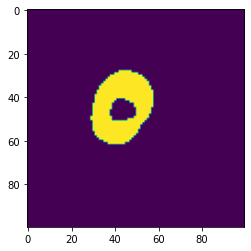

In [92]:
plt.imshow(mask_zstack[2][2600:2700, 1800:1900])

In [100]:
hund = [0, 0.0, 1, 3, 4]
if 1 in hund:
    hund.remove(5)
hund

ValueError: list.remove(x): x not in list

In [108]:
import time


print("hello")
end = time.time()
print(end - start)

hello
0.0003681182861328125


In [107]:
zstack = mask_zstack.copy()

In [109]:
start = time.time()
print(start)
for plane_index in range(zstack.shape[0]):
    single_plane = zstack[plane_index]
    unique_label_ids = list(np.unique(single_plane))
    if 0 in unique_label_ids:
        unique_label_ids.remove(0)
    elif 0.0 in unique_label_ids:
        unique_label_ids.remove(0.0)
    for label_id in unique_label_ids:
        roi = get_polygon_from_instance_segmentation(single_plane = single_plane, label_id = label_id)
        bounding_box_coords = [int(elem) for elem in roi.bounds]
        cropped_mask = single_plane[bounding_box_coords[0]:bounding_box_coords[2], bounding_box_coords[1]:bounding_box_coords[3]]
        cropped_mask_copy = cropped_mask.copy()
        cropped_mask_copy[np.where(cropped_mask_copy != label_id)] = 0
        filled_holes = binary_fill_holes(cropped_mask_copy)
        cropped_mask[np.where(filled_holes == True)] = label_id
end = time.time()
print(end - start)

1657879786.20879
232.230877161026




 ------------------------------------------------------------------- 




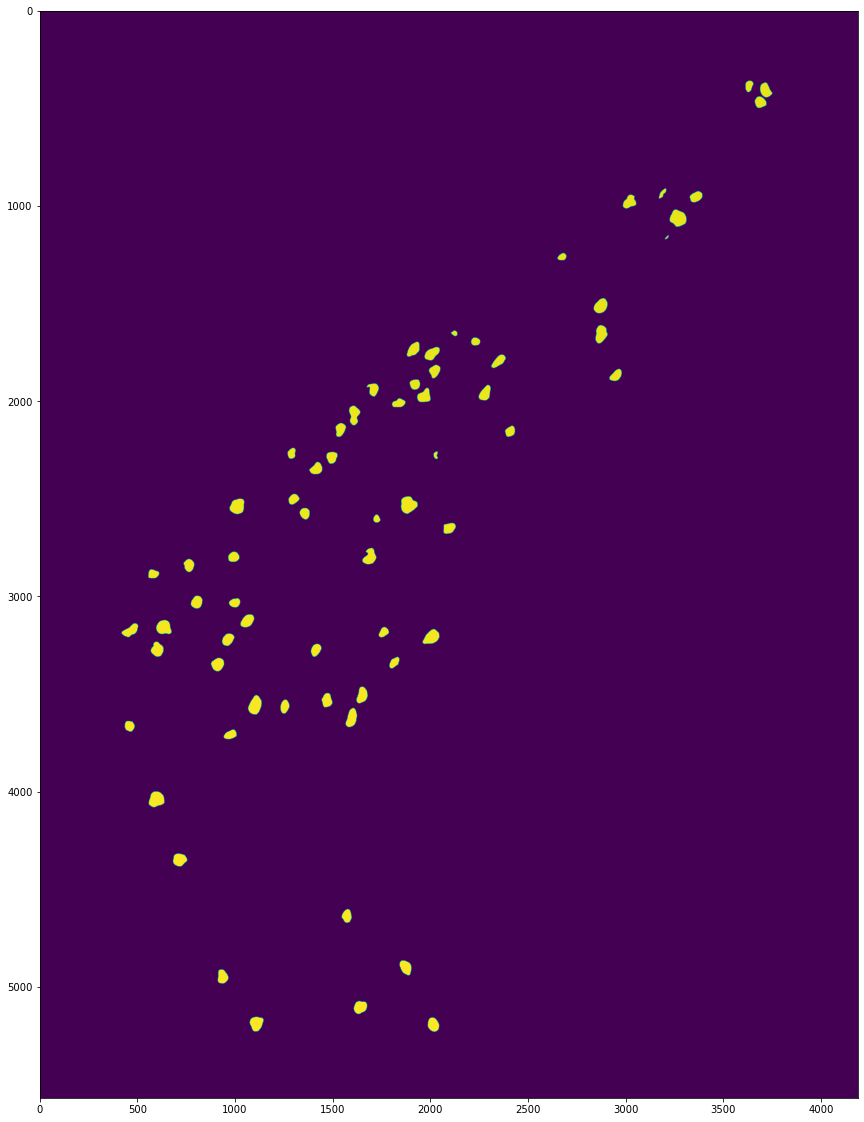

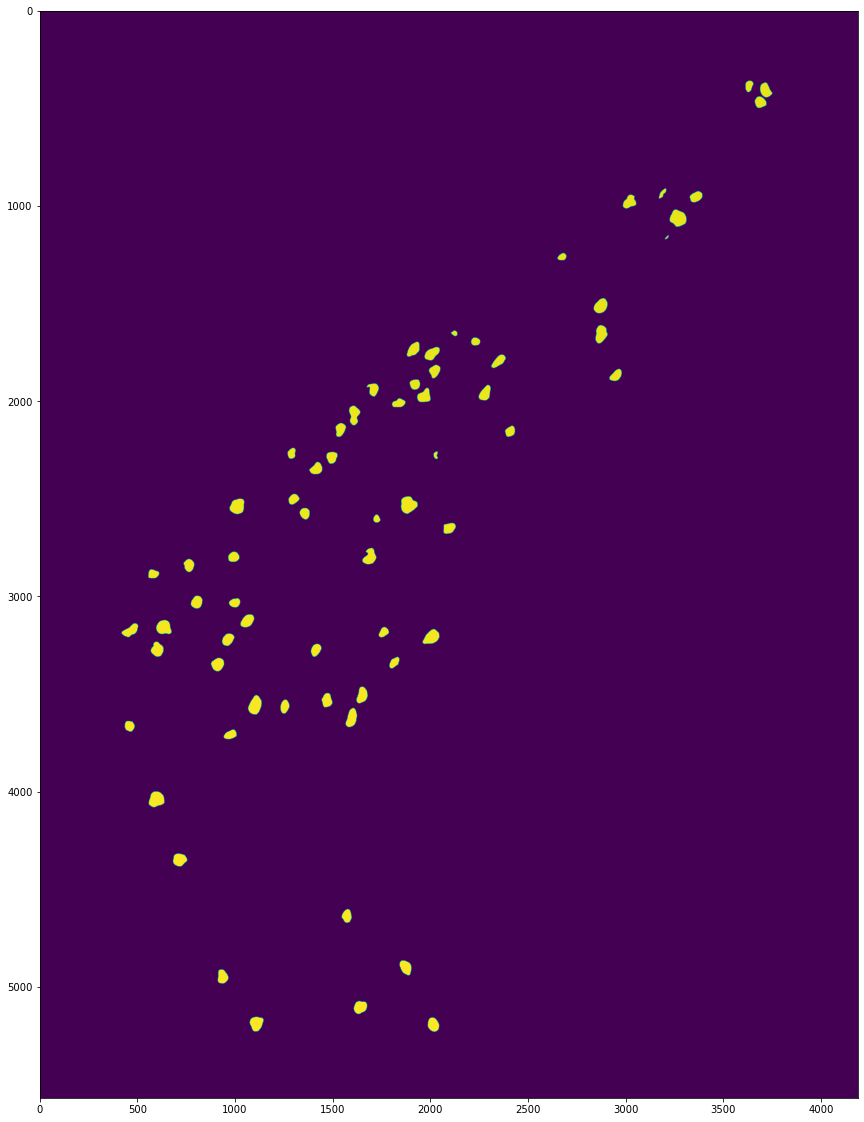



 ------------------------------------------------------------------- 




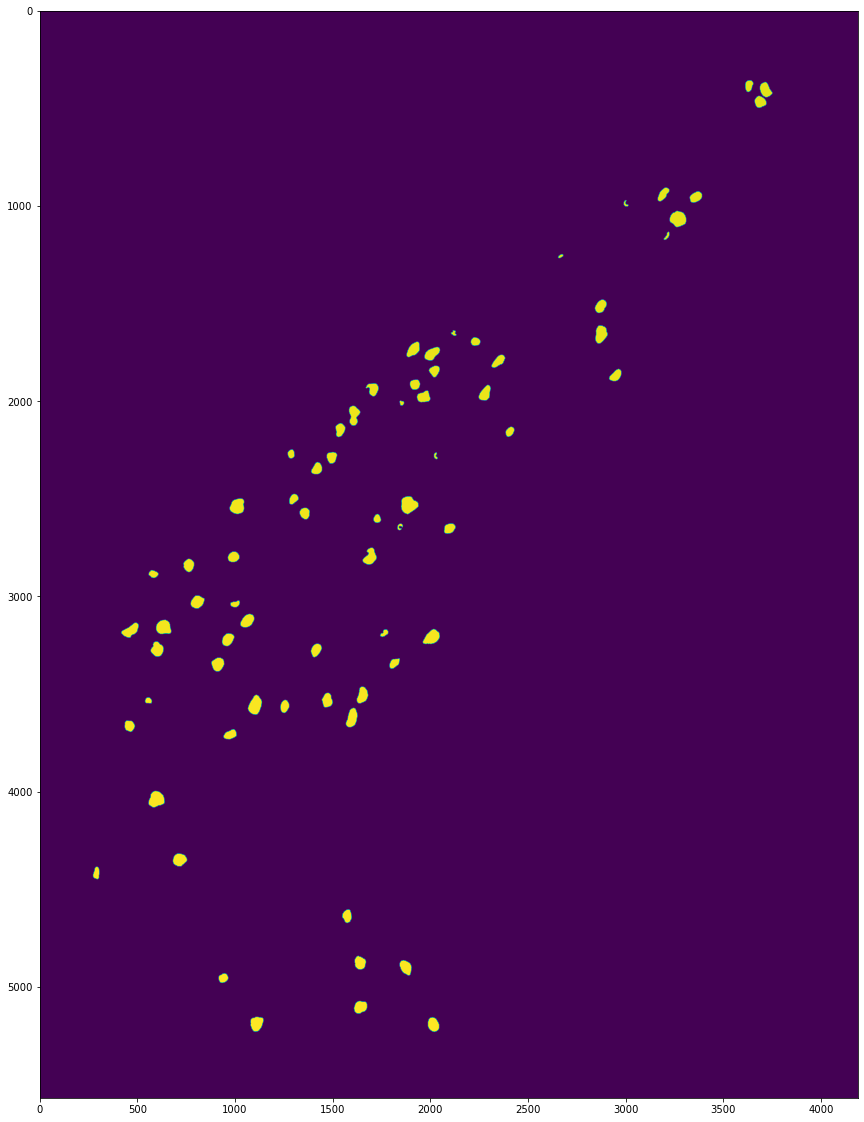

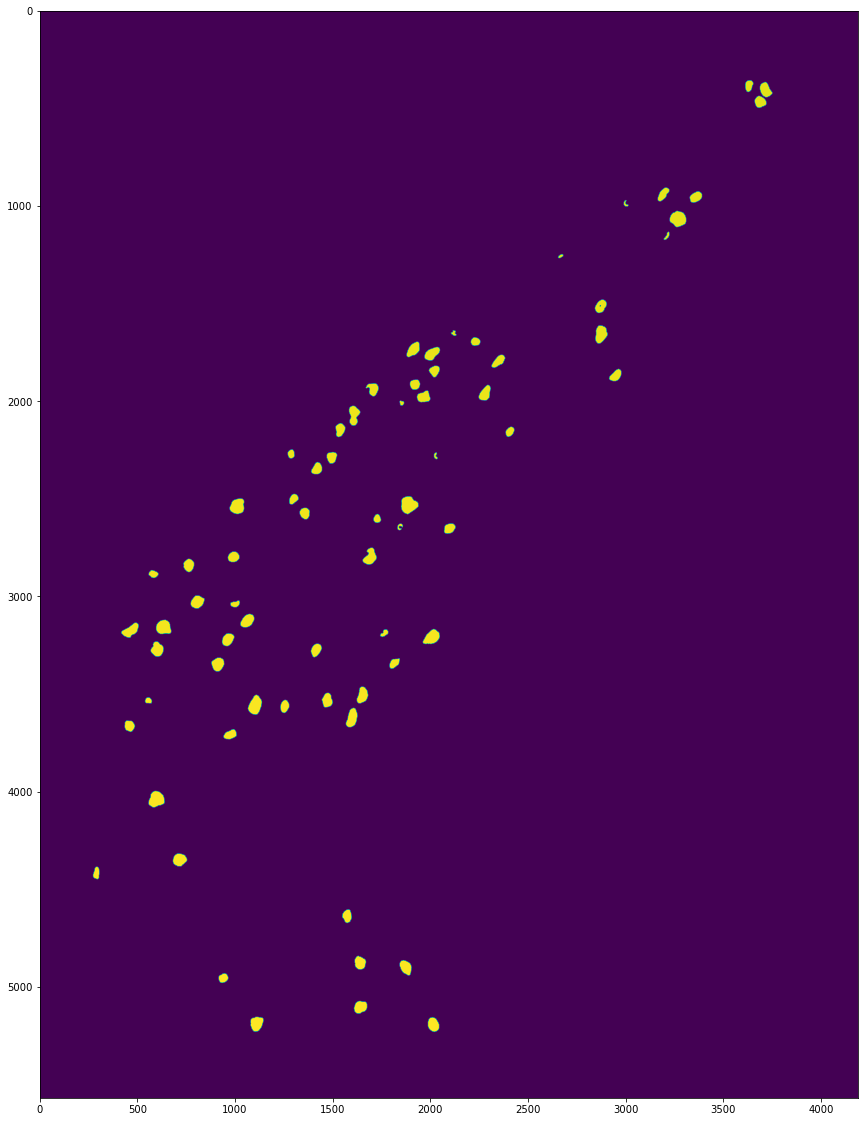



 ------------------------------------------------------------------- 




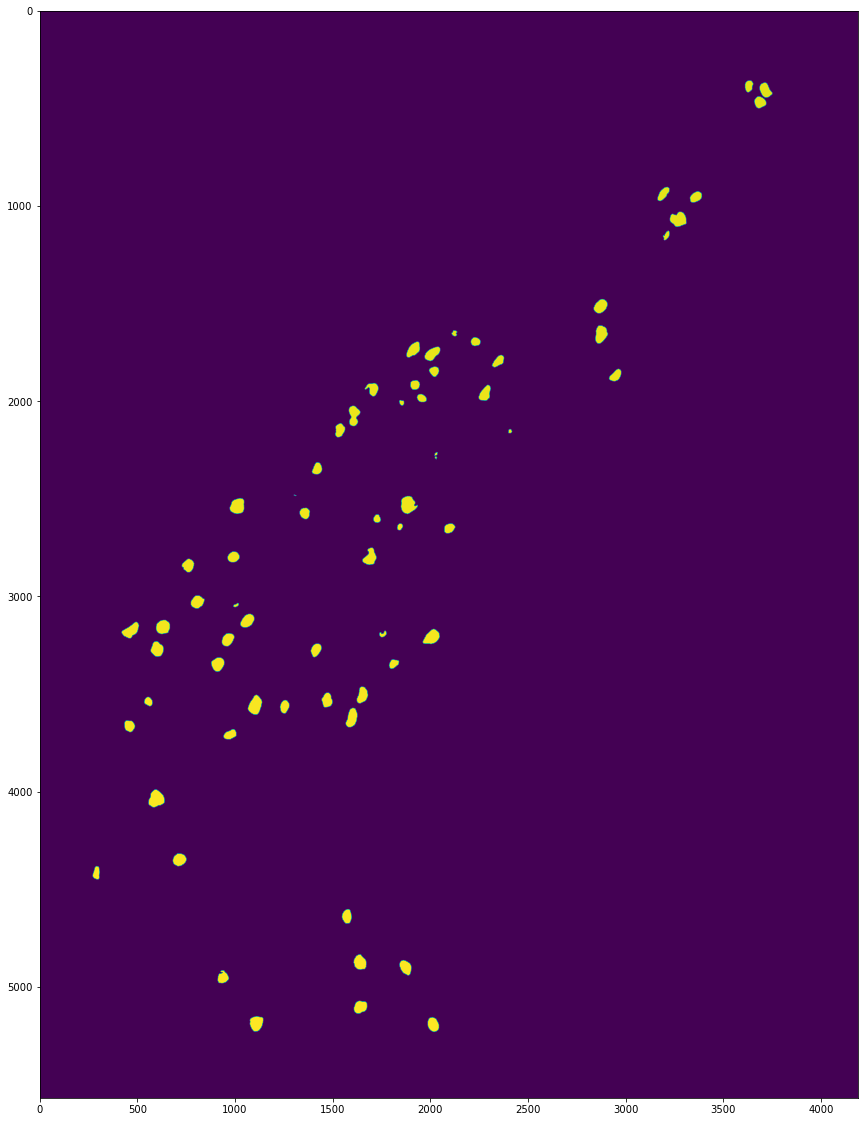

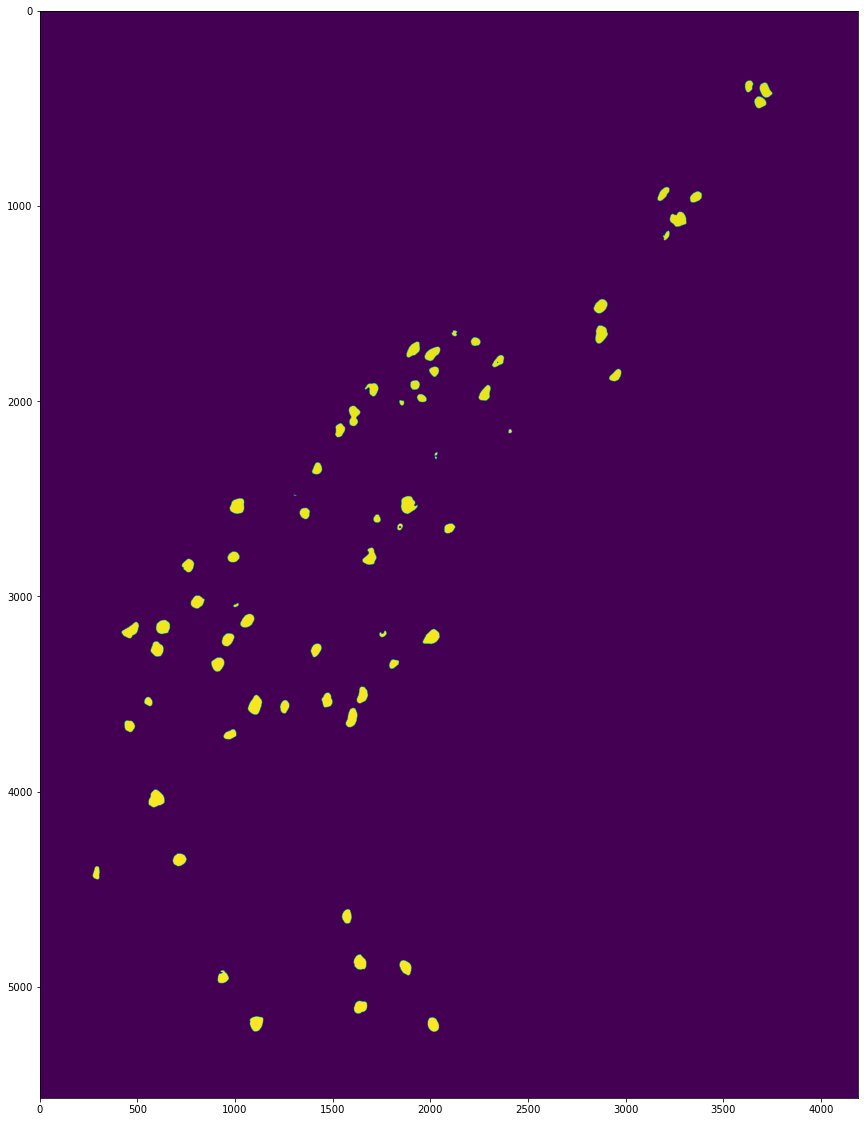



 ------------------------------------------------------------------- 




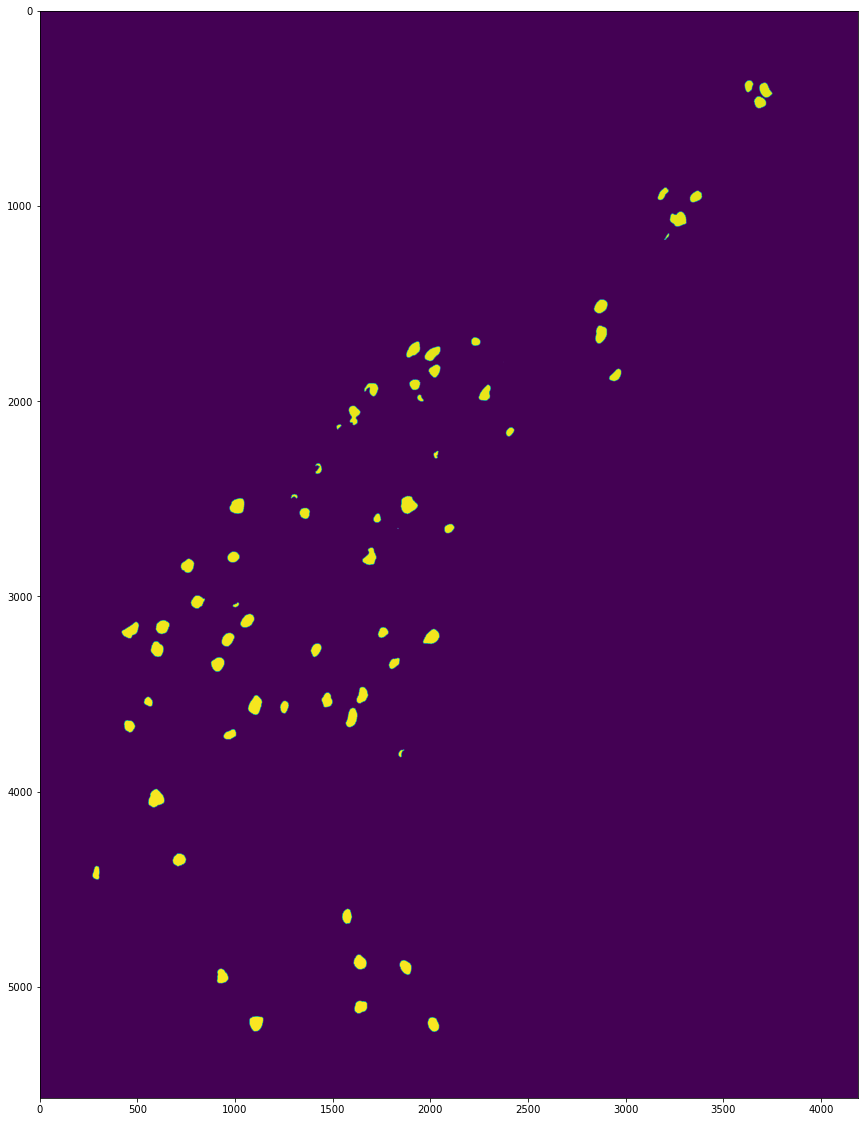

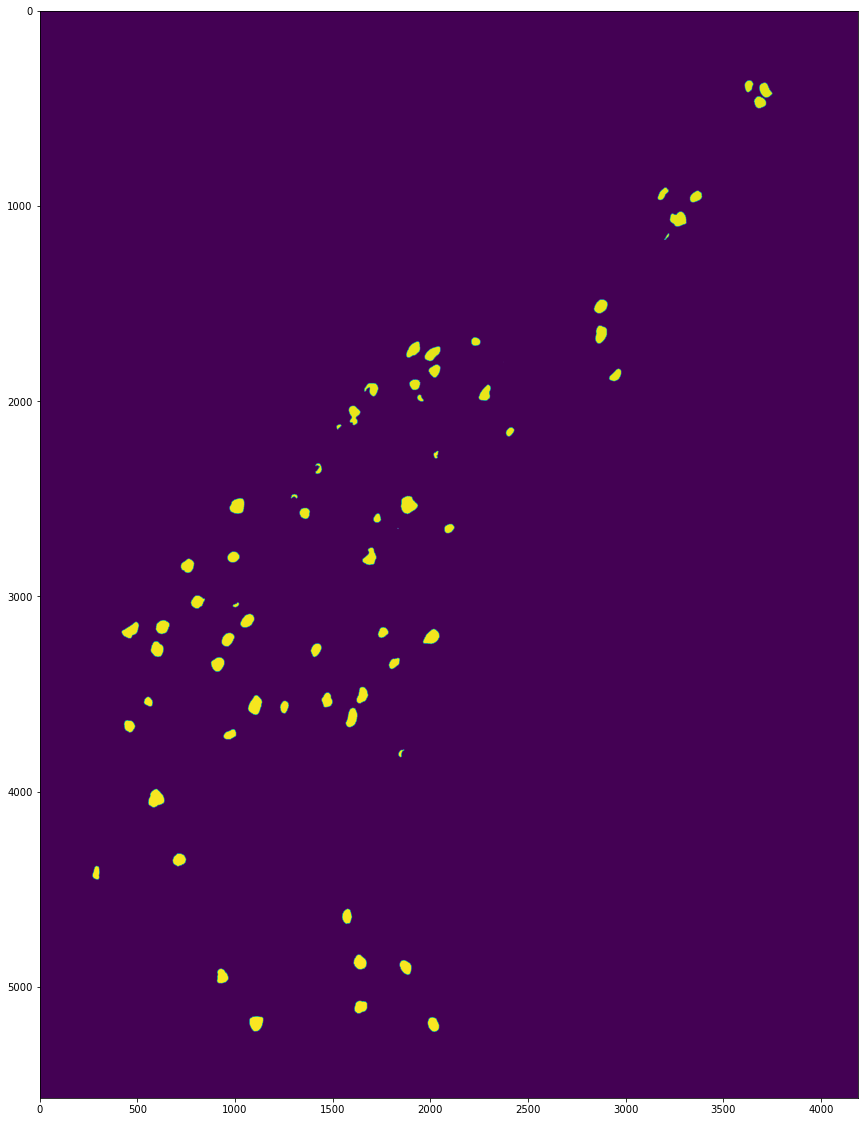



 ------------------------------------------------------------------- 




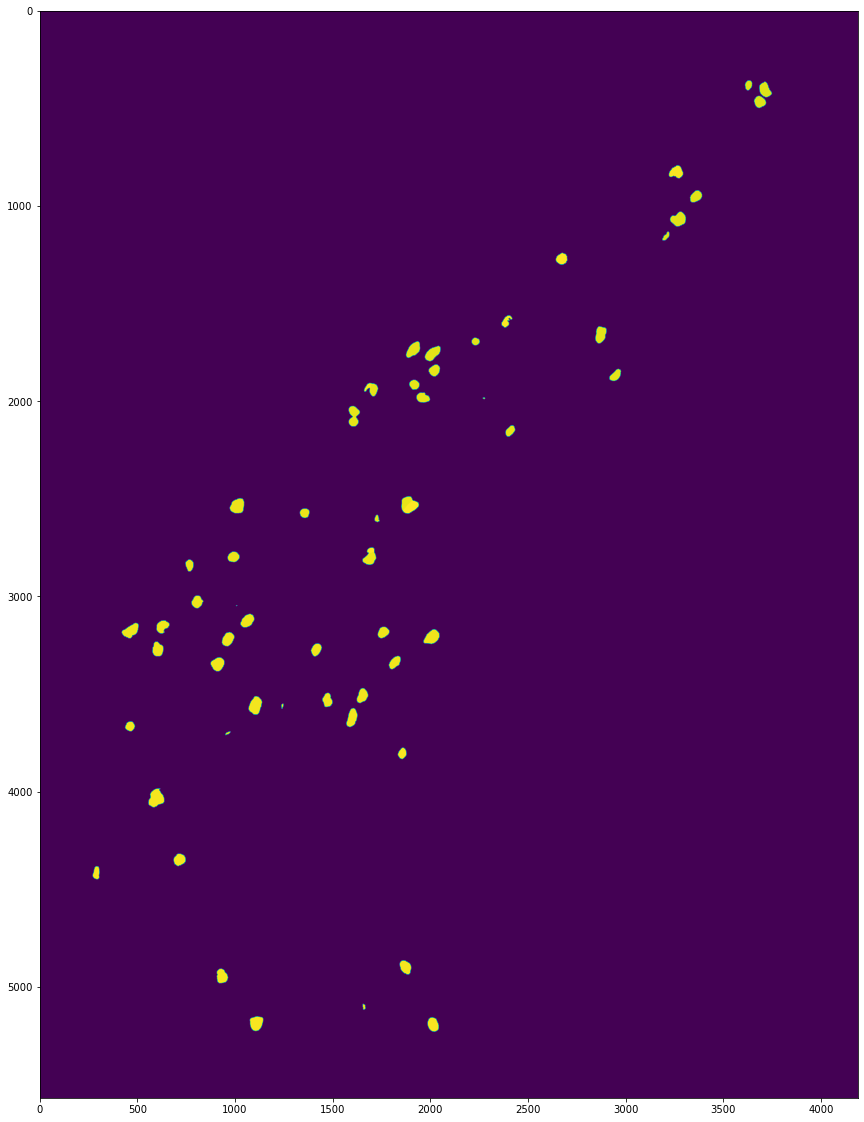

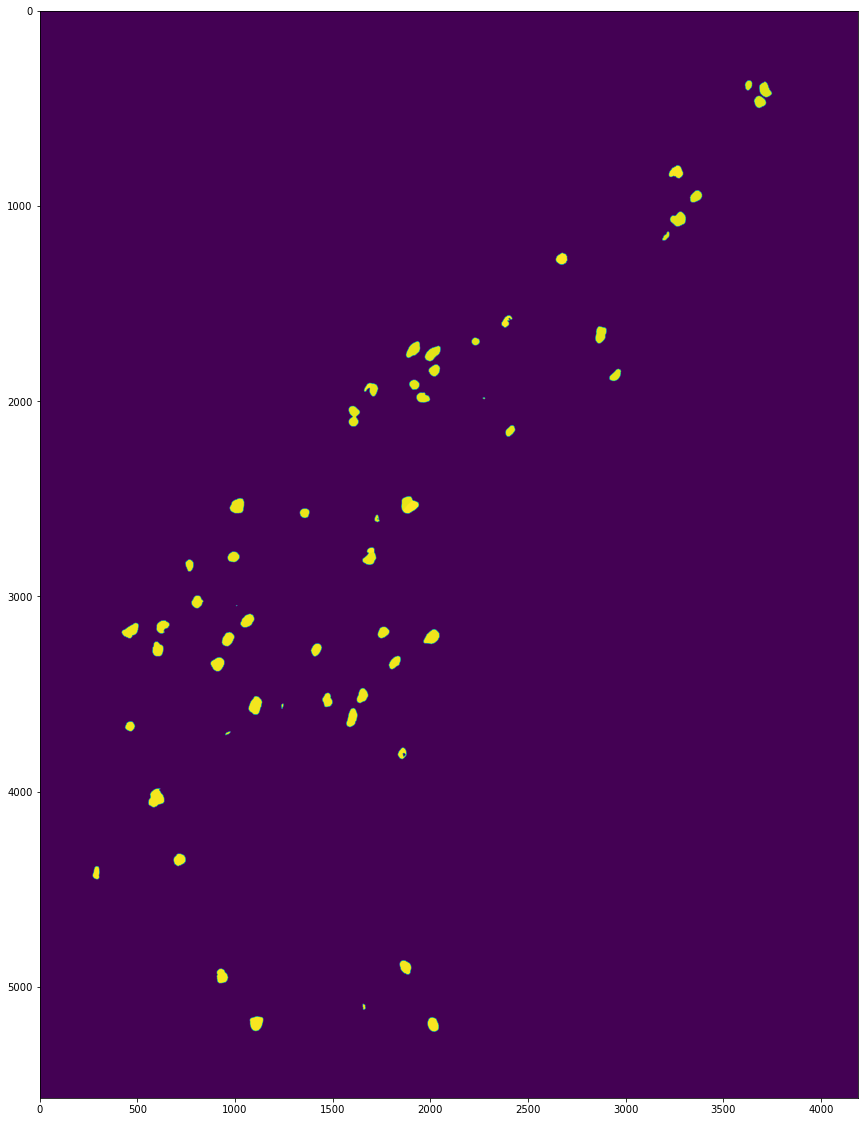



 ------------------------------------------------------------------- 




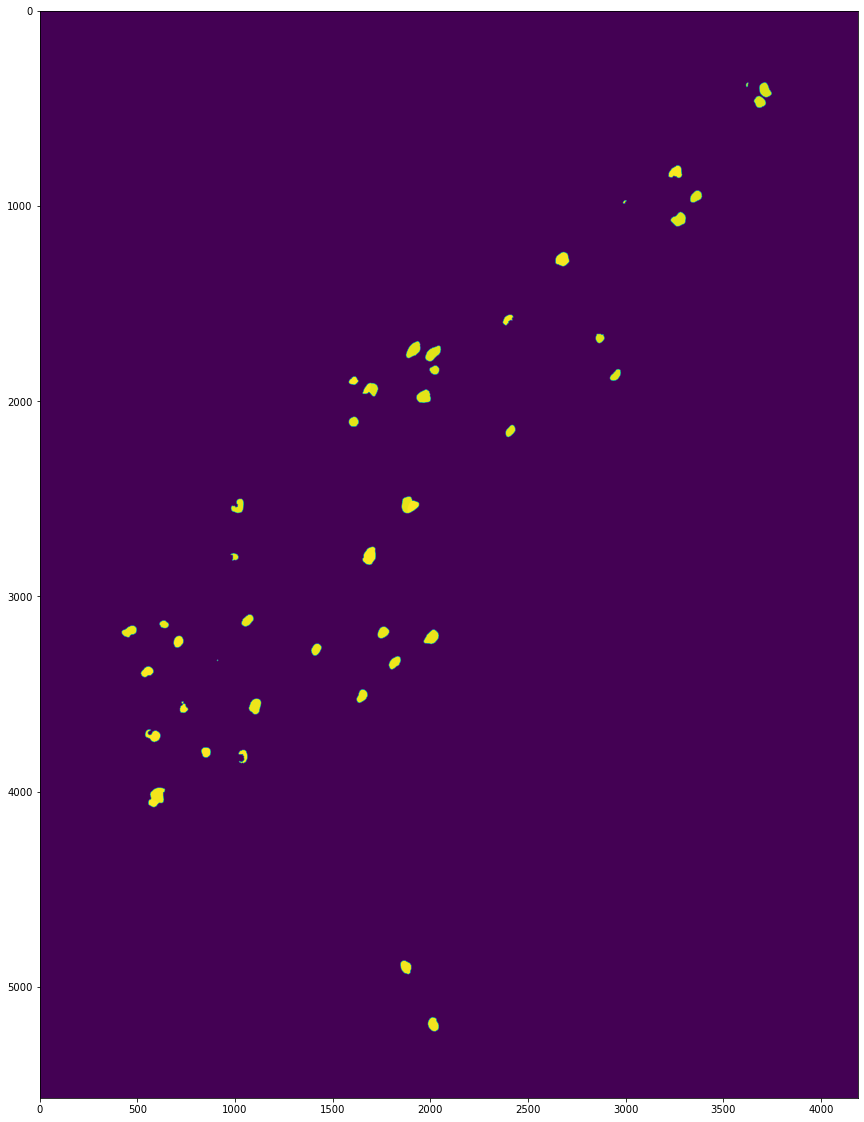

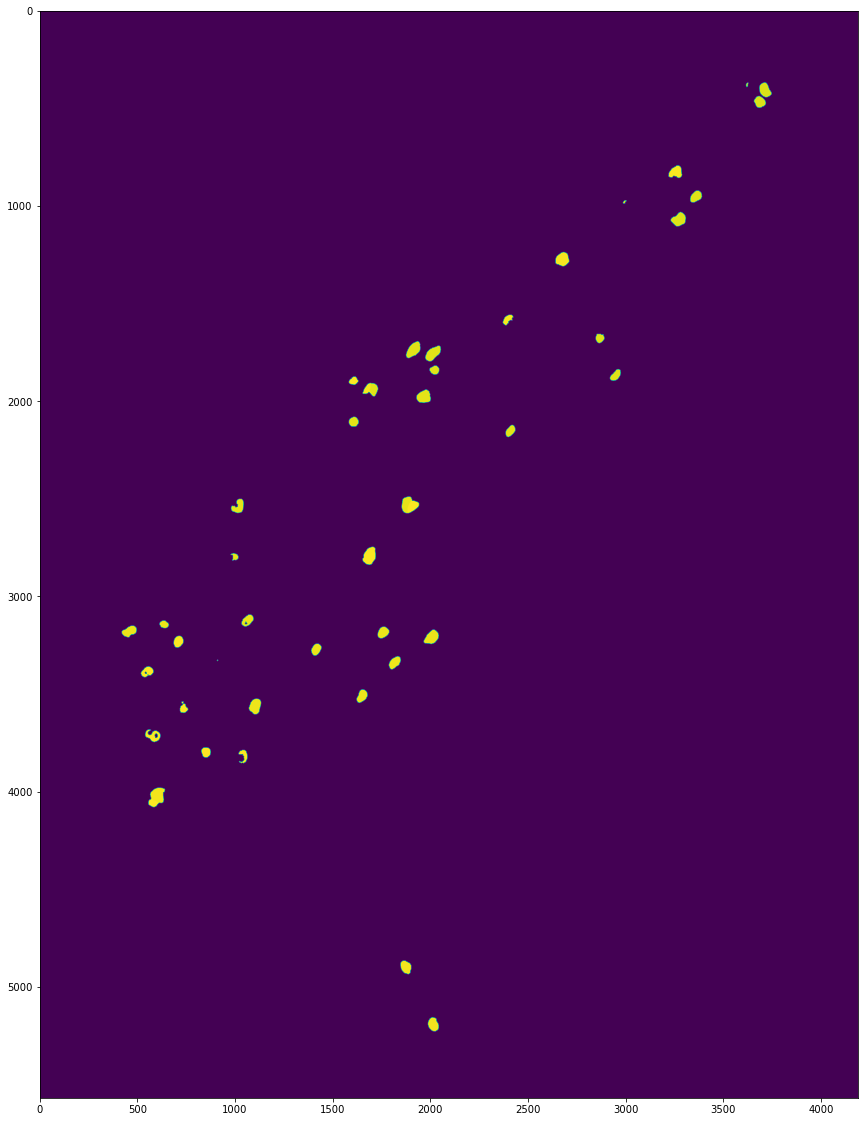



 ------------------------------------------------------------------- 




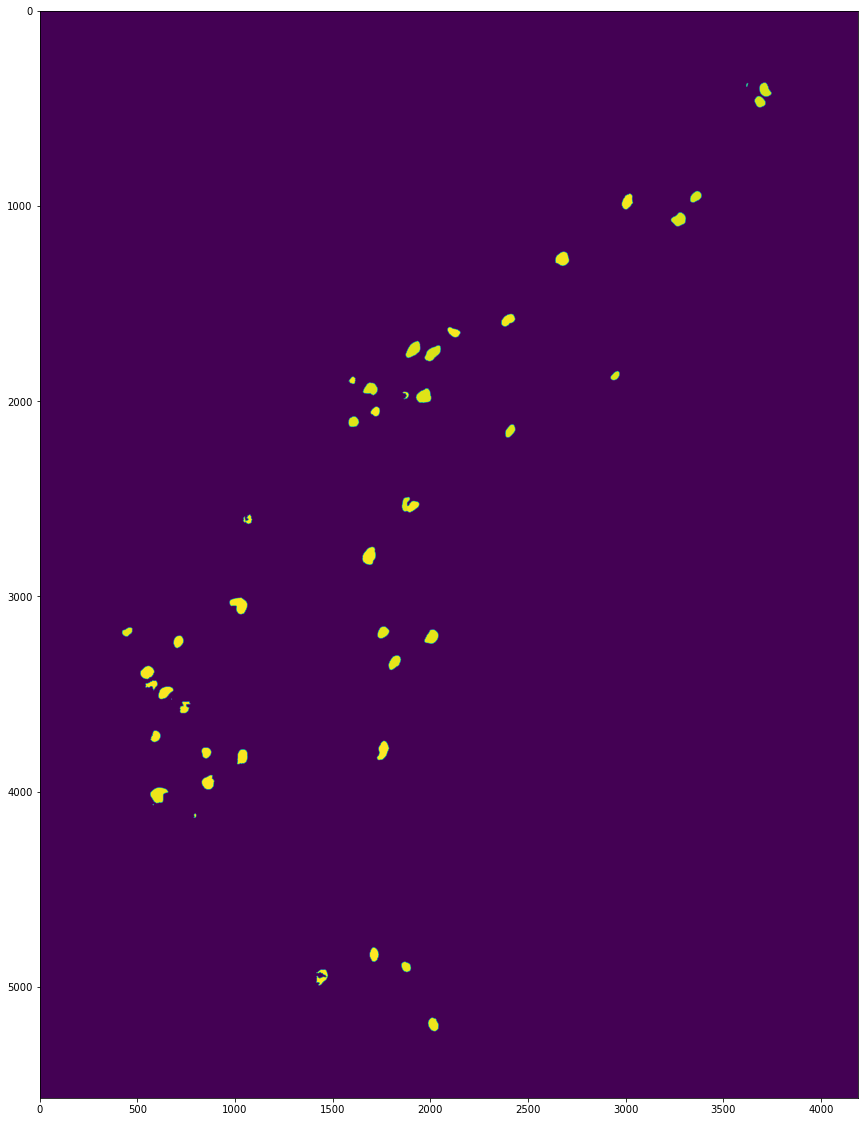

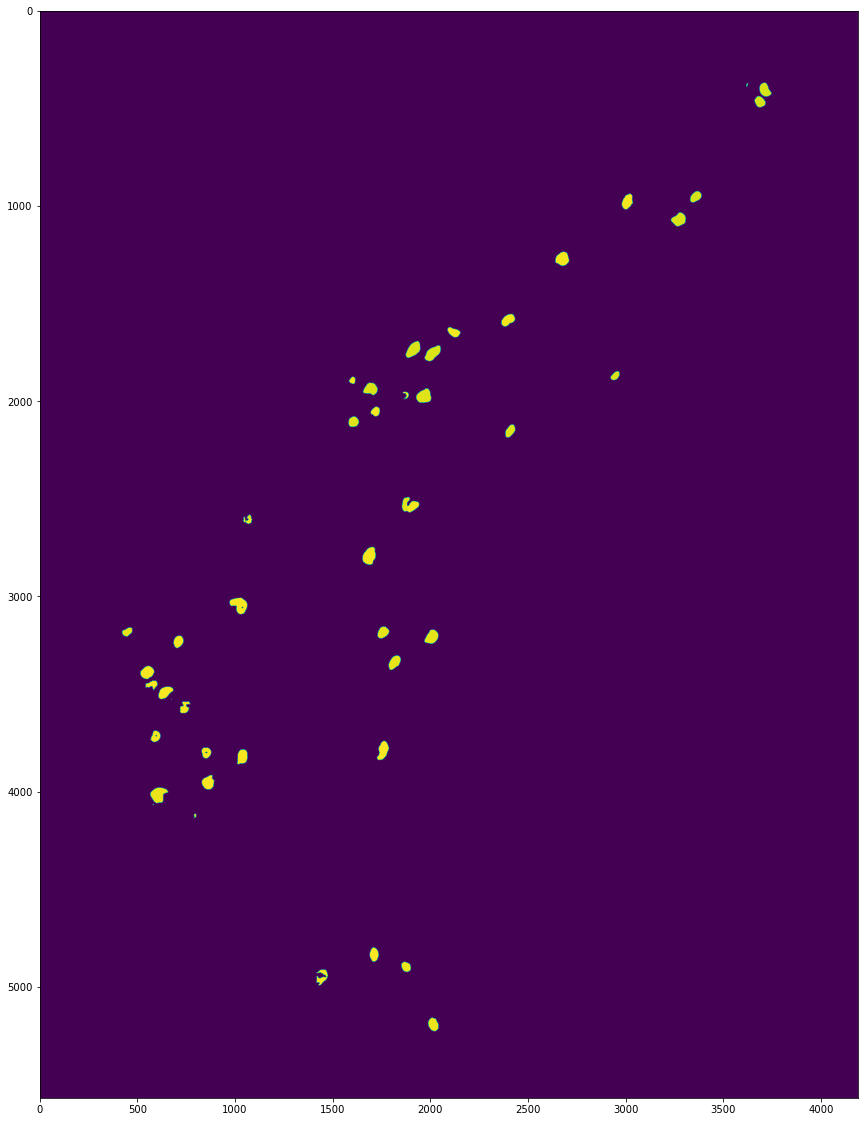



 ------------------------------------------------------------------- 




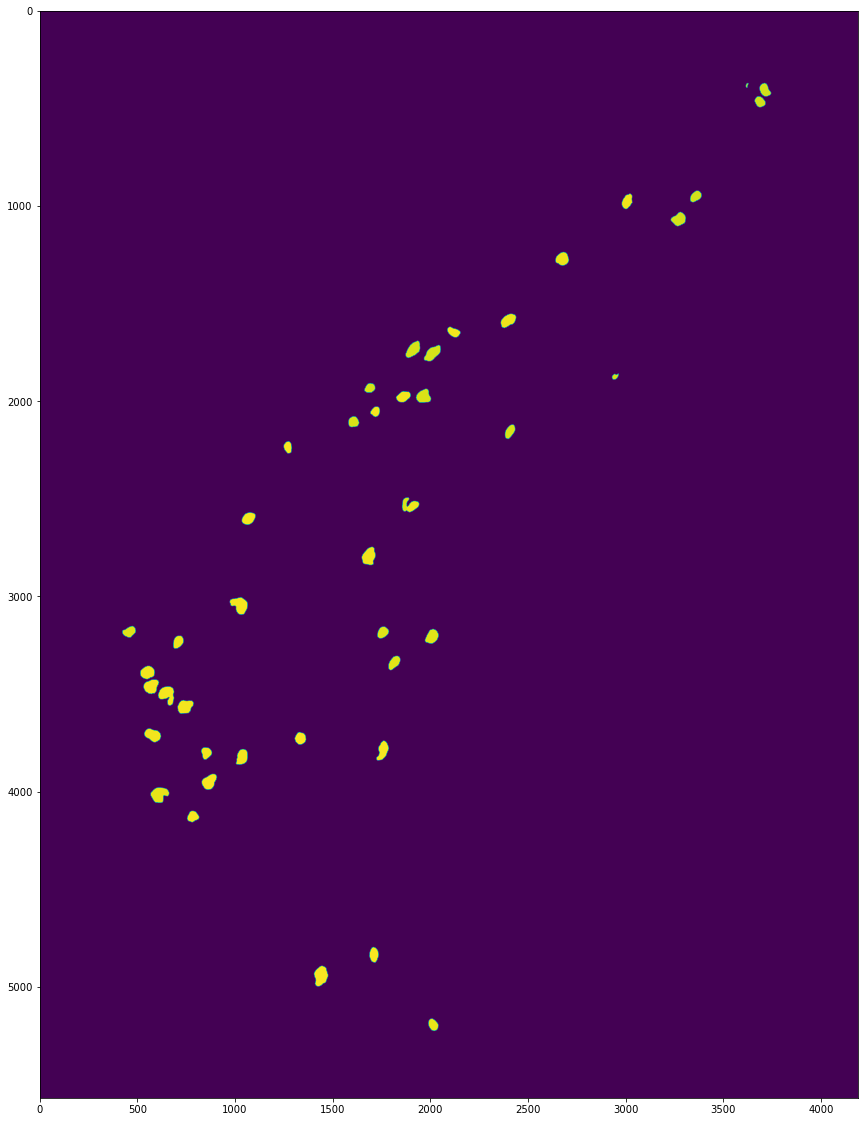

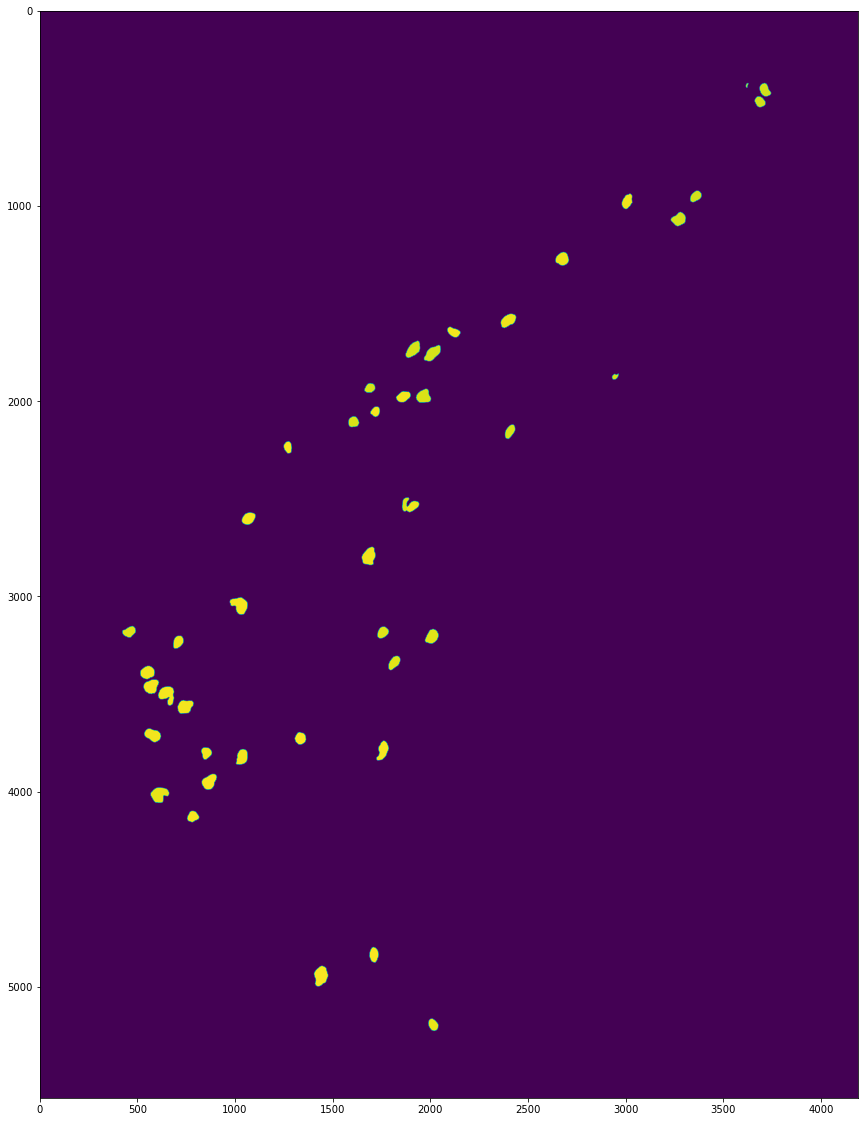



 ------------------------------------------------------------------- 




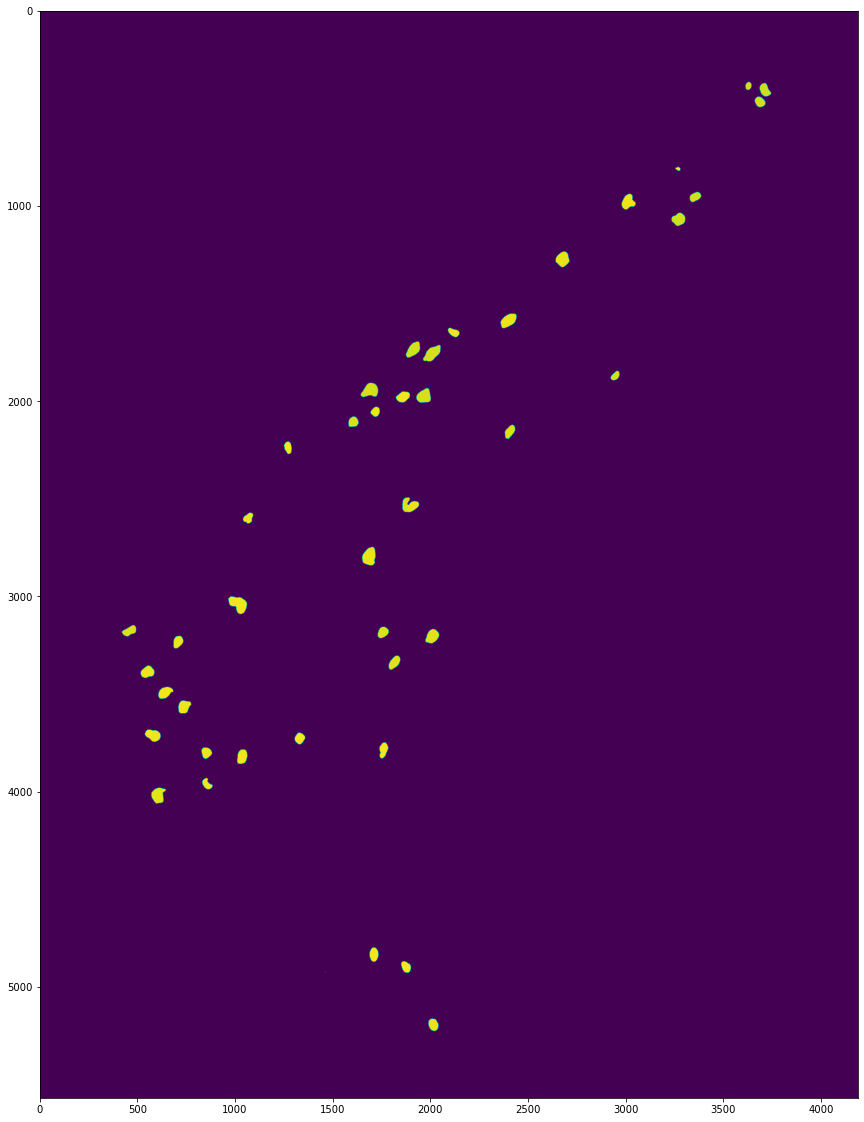

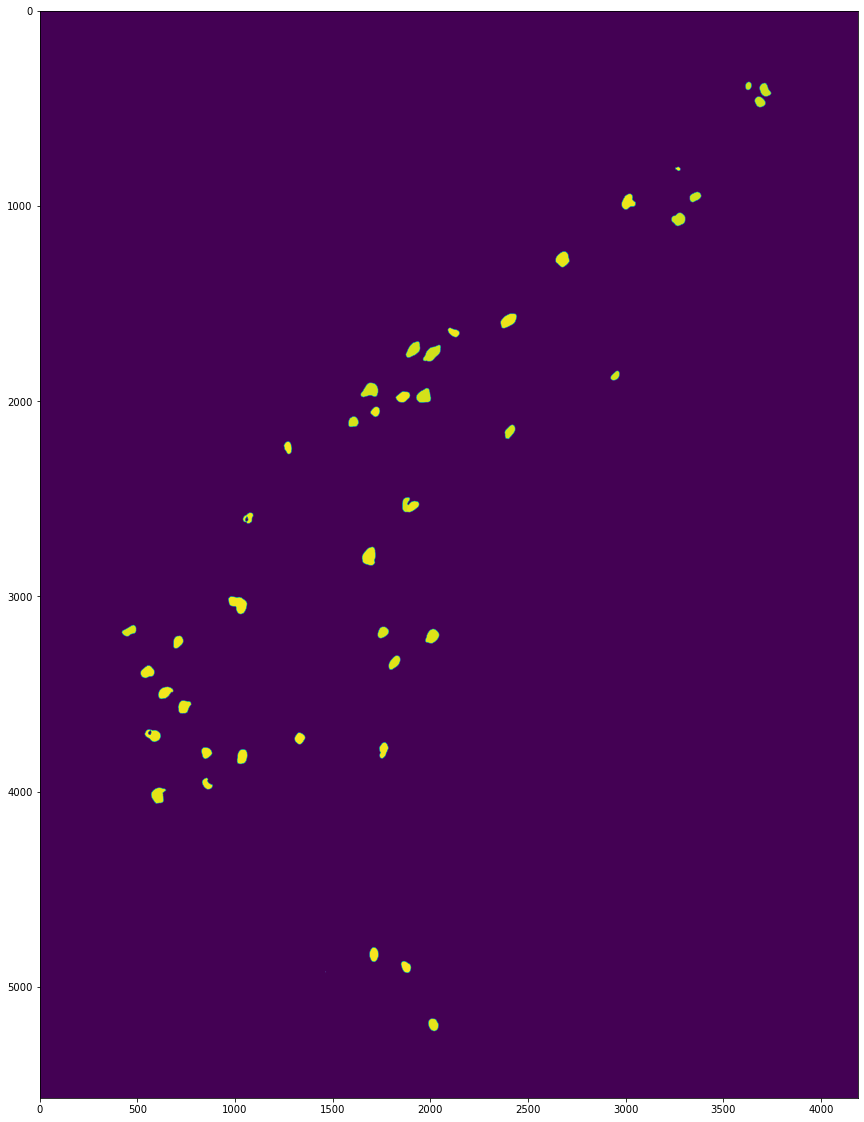



 ------------------------------------------------------------------- 




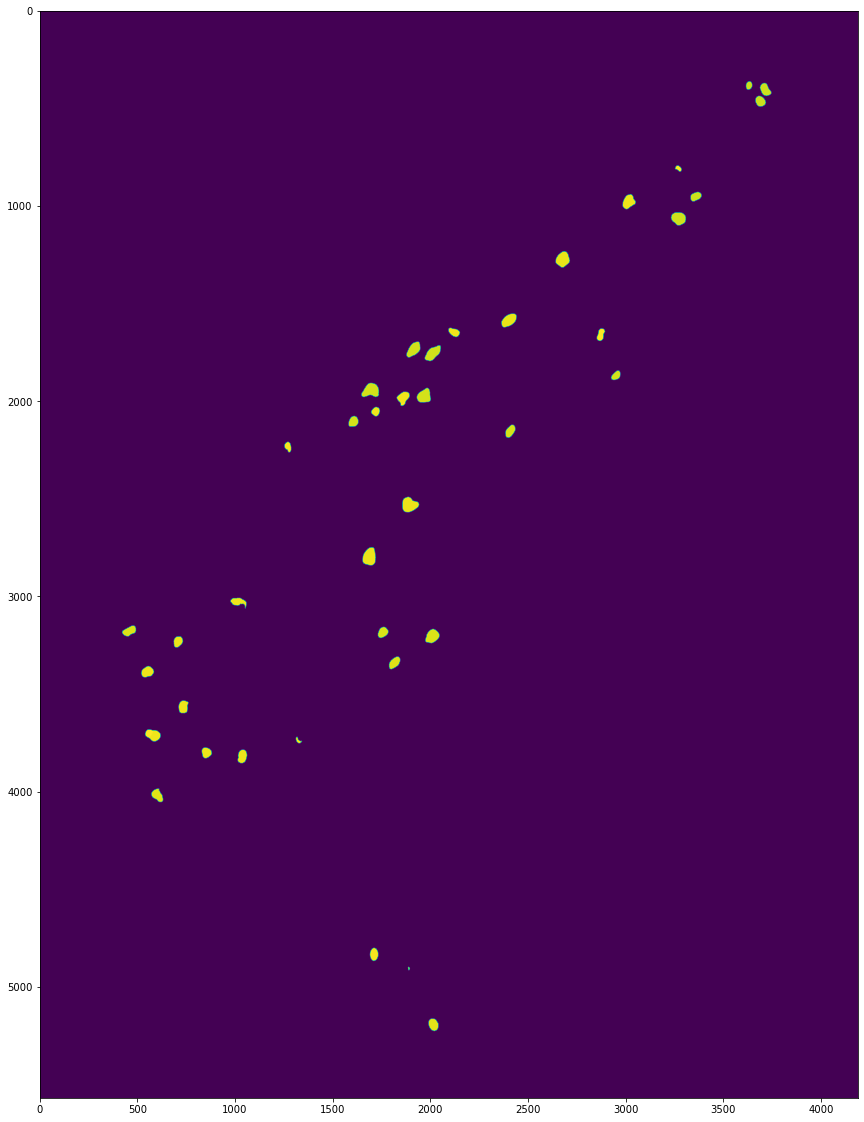

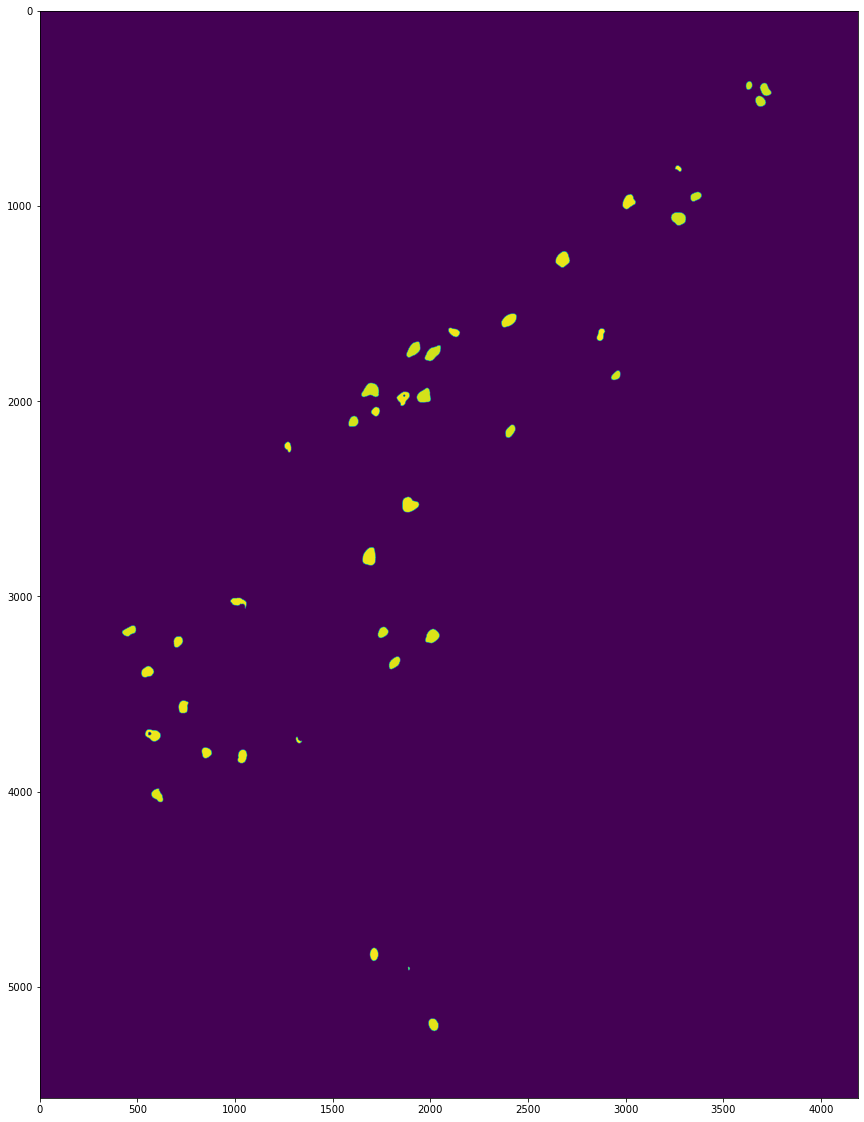



 ------------------------------------------------------------------- 




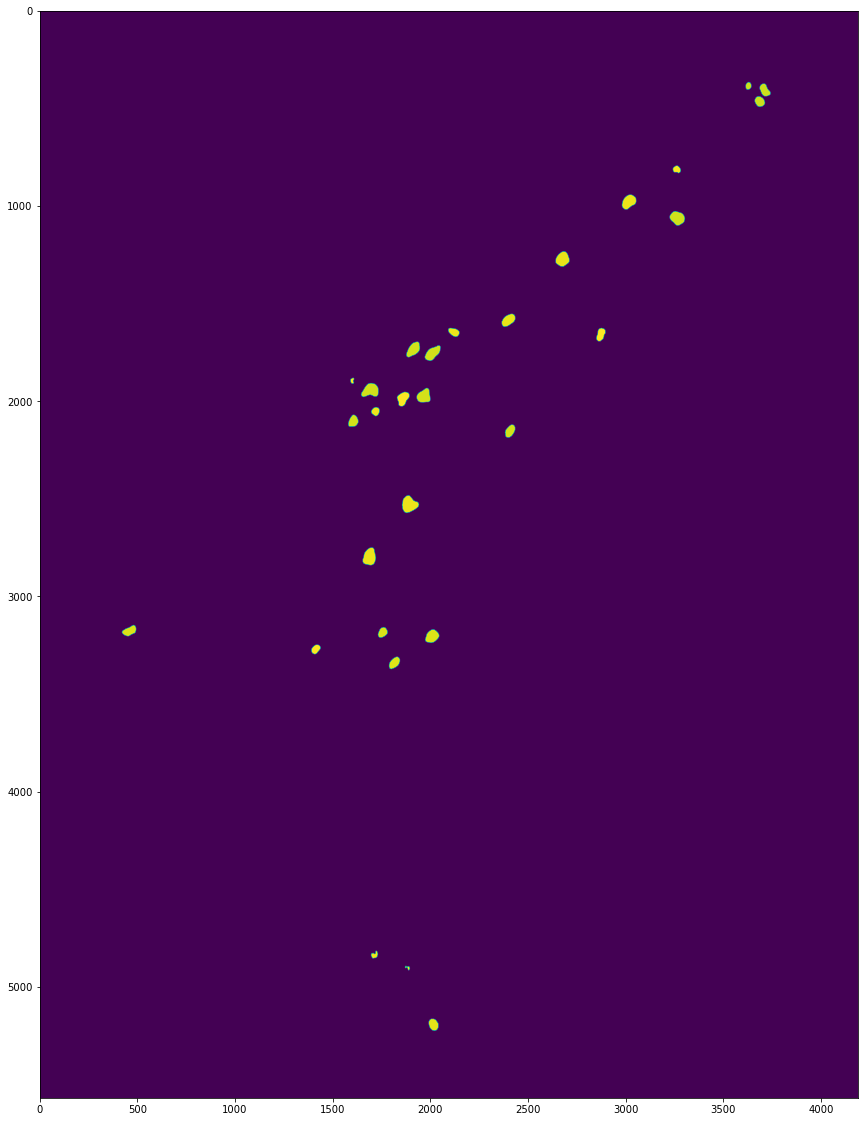

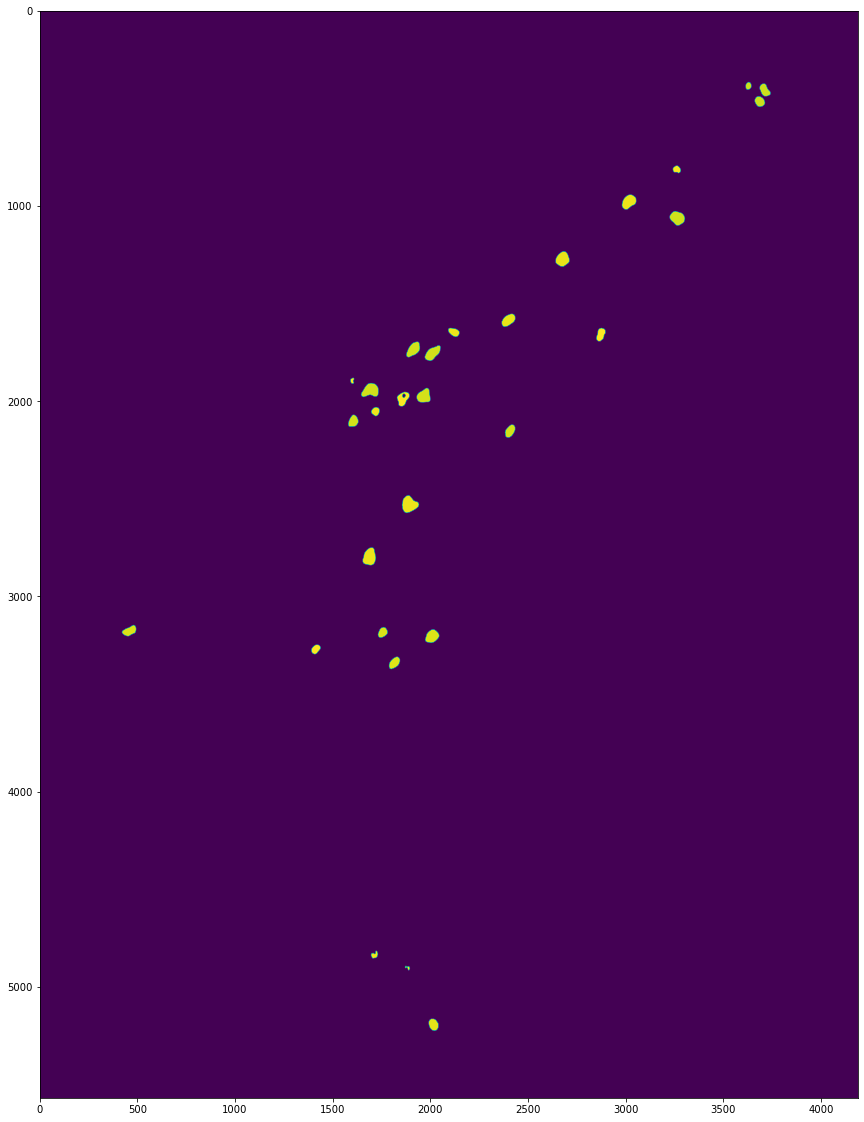



 ------------------------------------------------------------------- 




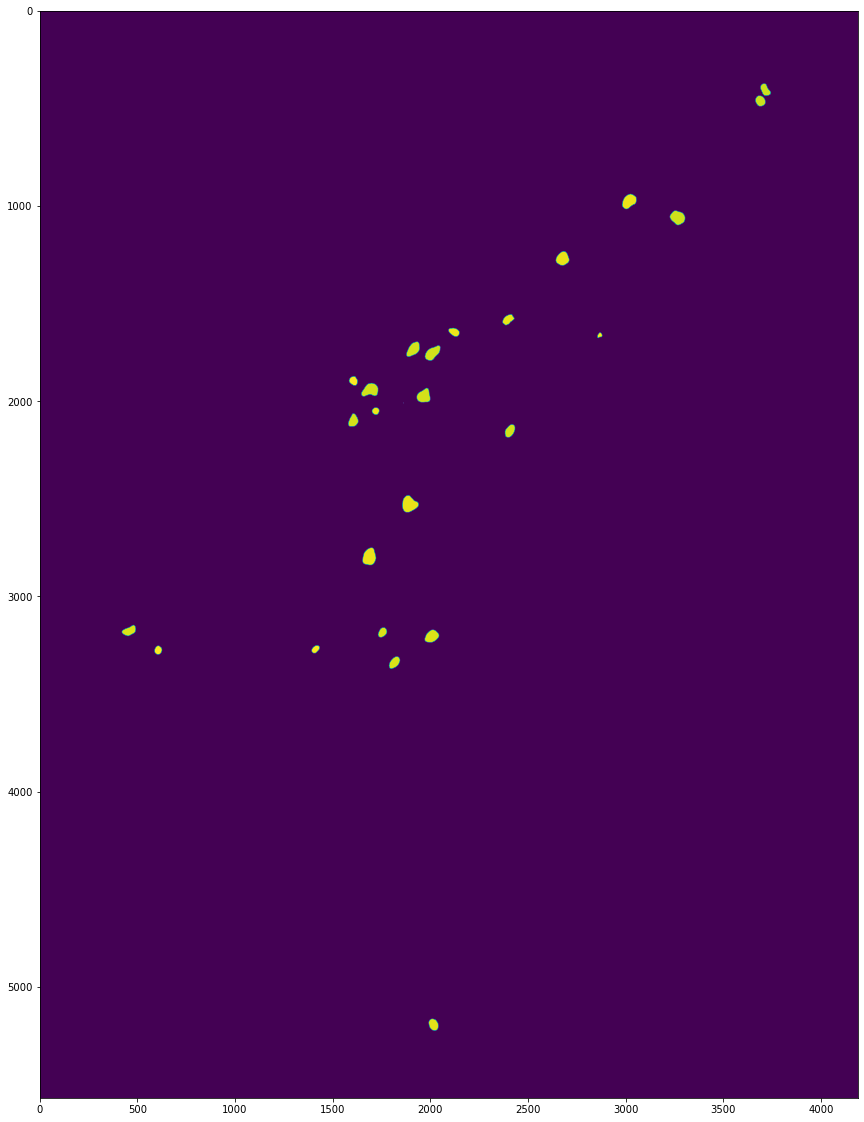

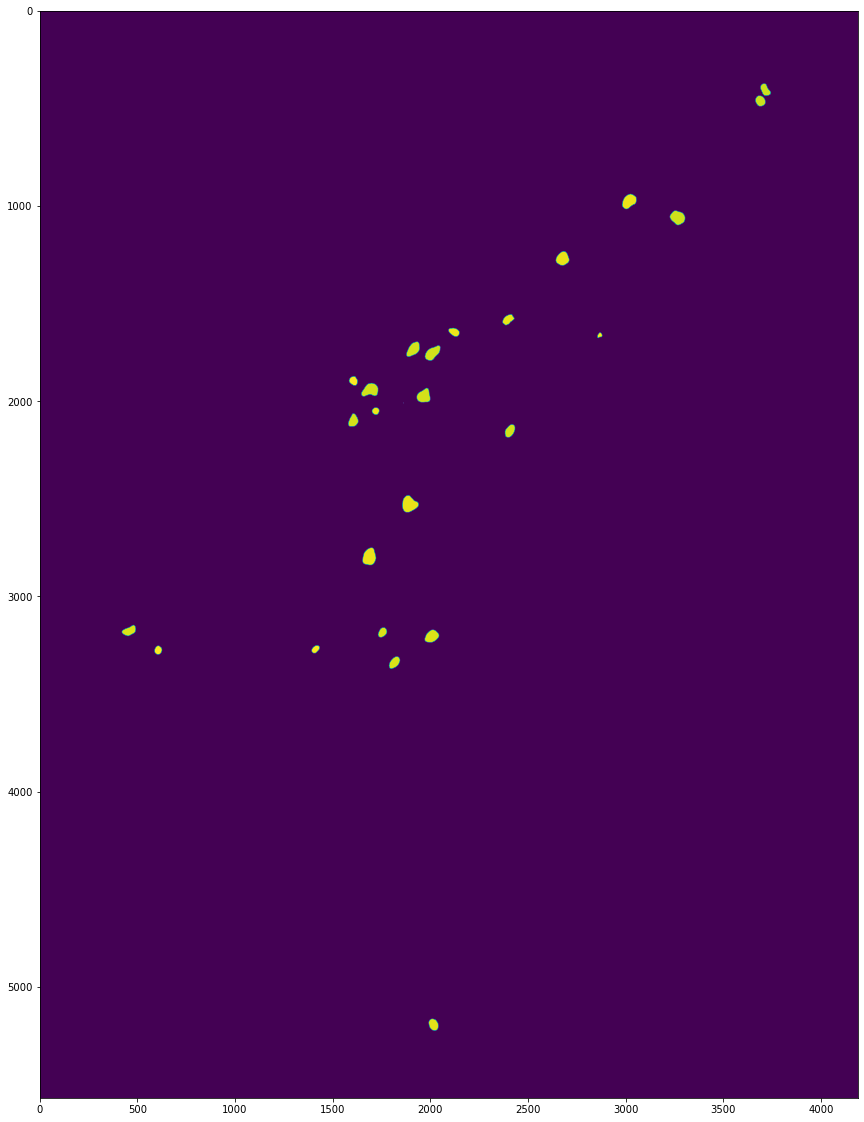



 ------------------------------------------------------------------- 




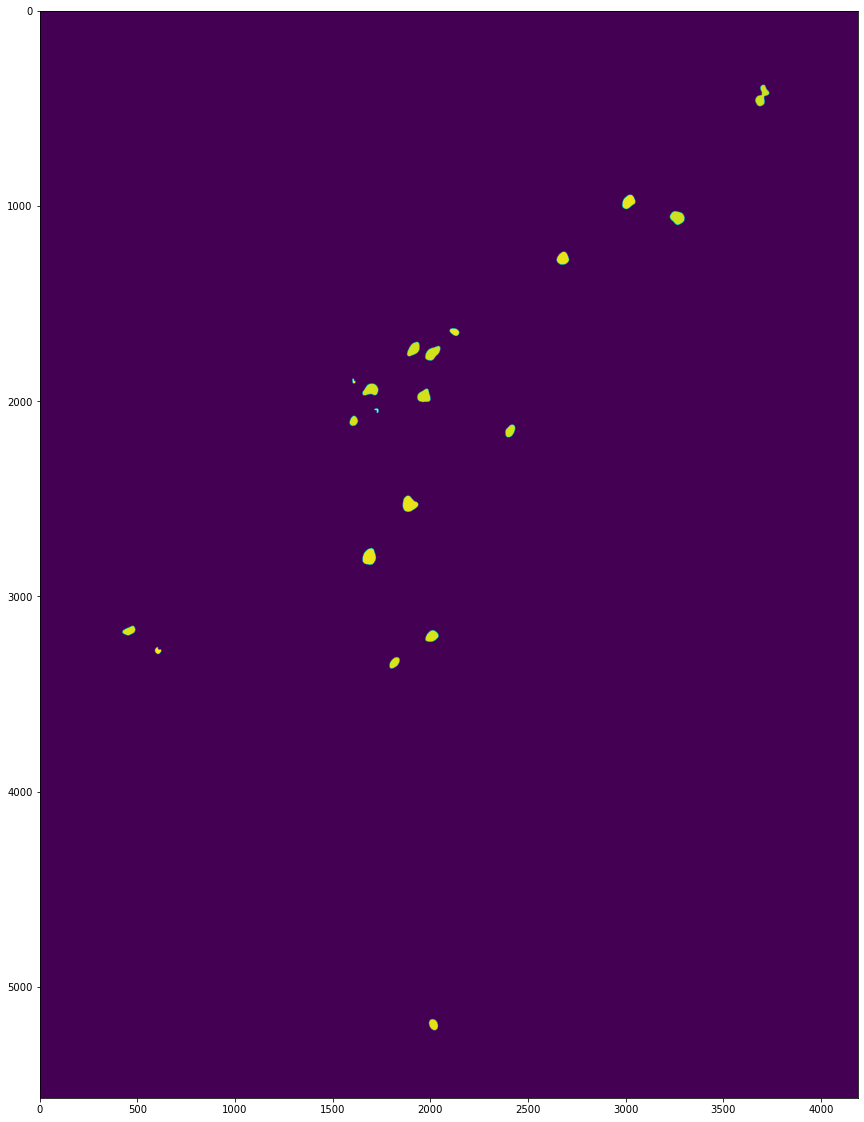

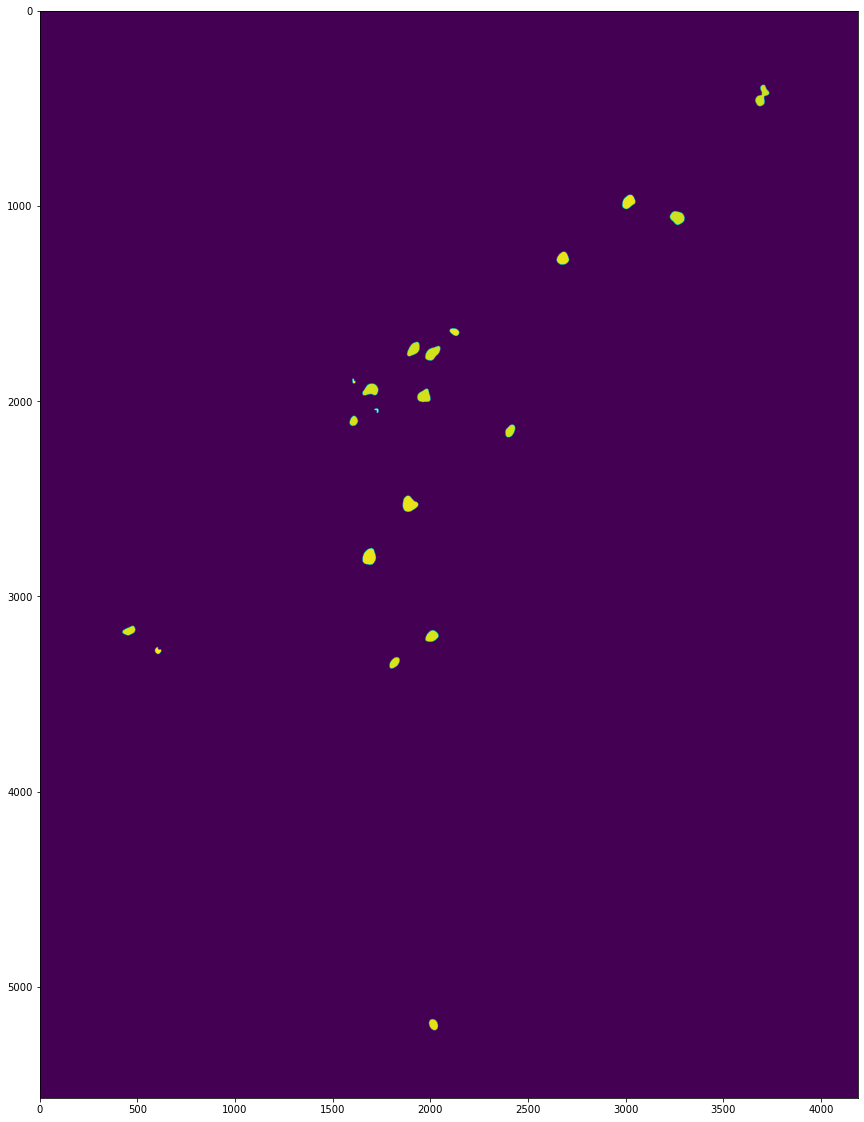

In [111]:
for i in range(13):
    print('\n\n ------------------------------------------------------------------- \n\n')
    fig = plt.figure(figsize=(20,20))
    plt.imshow(zstack[i])
    plt.show()
    fig2 = plt.figure(figsize=(20,20))
    plt.imshow(mask_zstack[i])
    plt.show()
    

In [112]:
np.unique(zstack)

array([   0, 2001, 2002, 2003, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2063,
       2064, 2065, 2066, 2068, 2069, 2070, 2071, 2074, 2075, 2076, 2077,
       2078, 2079, 2080, 2082, 2083, 2084, 2085, 2086, 2093, 2094, 2095,
       2096, 2097, 2102, 2103, 2106, 2108, 2109, 2110, 2111, 2112, 2113,
       2114, 2115, 2116, 2117, 2119, 2120, 2121, 2122, 2123, 2124, 2125,
       2128, 2129, 2131, 2132, 2133, 2140, 2152, 2159, 2162, 2163, 2164,
       2165, 2167, 2168, 2170], dtype=uint16)

In [113]:
np.unique(mask_zstack)

array([   0, 2001, 2002, 2003, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2063,
       2064, 2065, 2066, 2068, 2069, 2070, 2071, 2074, 2075, 2076, 2077,
       2078, 2079, 2080, 2082, 2083, 2084, 2085, 2086, 2093, 2094, 2095,
       2096, 2097, 2102, 2103, 2106, 2108, 2109, 2110, 2111, 2112, 2113,
       2114, 2115, 2116, 2117, 2119, 2120, 2121, 2122, 2123, 2124, 2125,
       2128, 2129, 2131, 2132, 2133, 2140, 2152, 2159, 2162, 2163, 2164,
       2165, 2167, 2168, 2170], dtype=uint16)

In [ ]:
for i in range(13):
    fig = plt.figure(figsize=(20,20))
    plt.imshow(mask_zstack[i])
    plt.show()

In [101]:
label_id = 2082
single_plane = mask_zstack[2].copy()
singple_plane_pre = single_plane.copy()
unique_label_ids = list(np.unique(single_plane))
if 0 in unique_label_ids:
    unique_label_ids.remove(0)
elif 0.0 in unique_label_ids:
    unique_label_ids.remove(0.0)
for label_id in unique_label_ids:
    roi = get_polygon_from_instance_segmentation(single_plane = single_plane, label_id = label_id)
    bounding_box_coords = [int(elem) for elem in roi.bounds]
    cropped_mask = single_plane[bounding_box_coords[0]:bounding_box_coords[2], bounding_box_coords[1]:bounding_box_coords[3]]
    cropped_mask_copy = cropped_mask.copy()
    cropped_mask_copy[np.where(cropped_mask_copy != label_id)] = 0
    filled_holes = binary_fill_holes(cropped_mask_copy)
    cropped_mask[np.where(filled_holes == True)] = label_id 

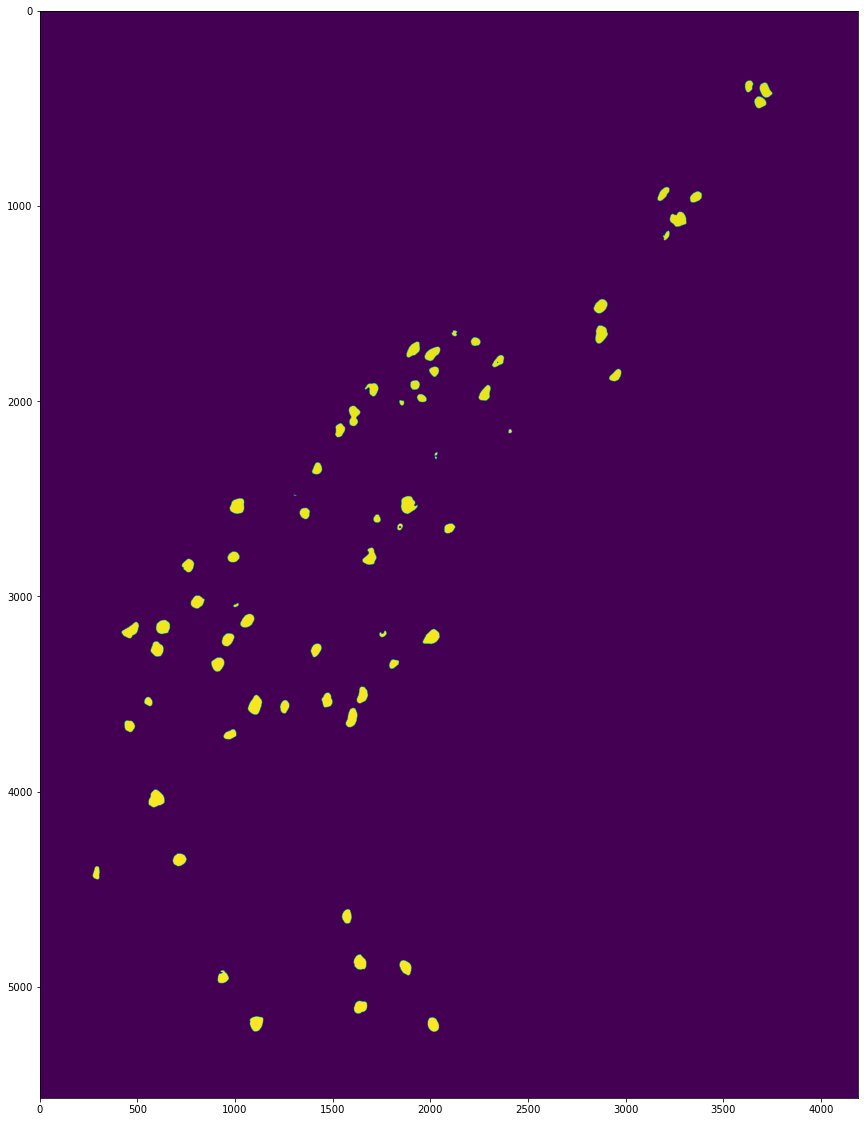

In [104]:
fig = plt.figure(figsize=(20,20))
plt.imshow(singple_plane_pre)
plt.show()


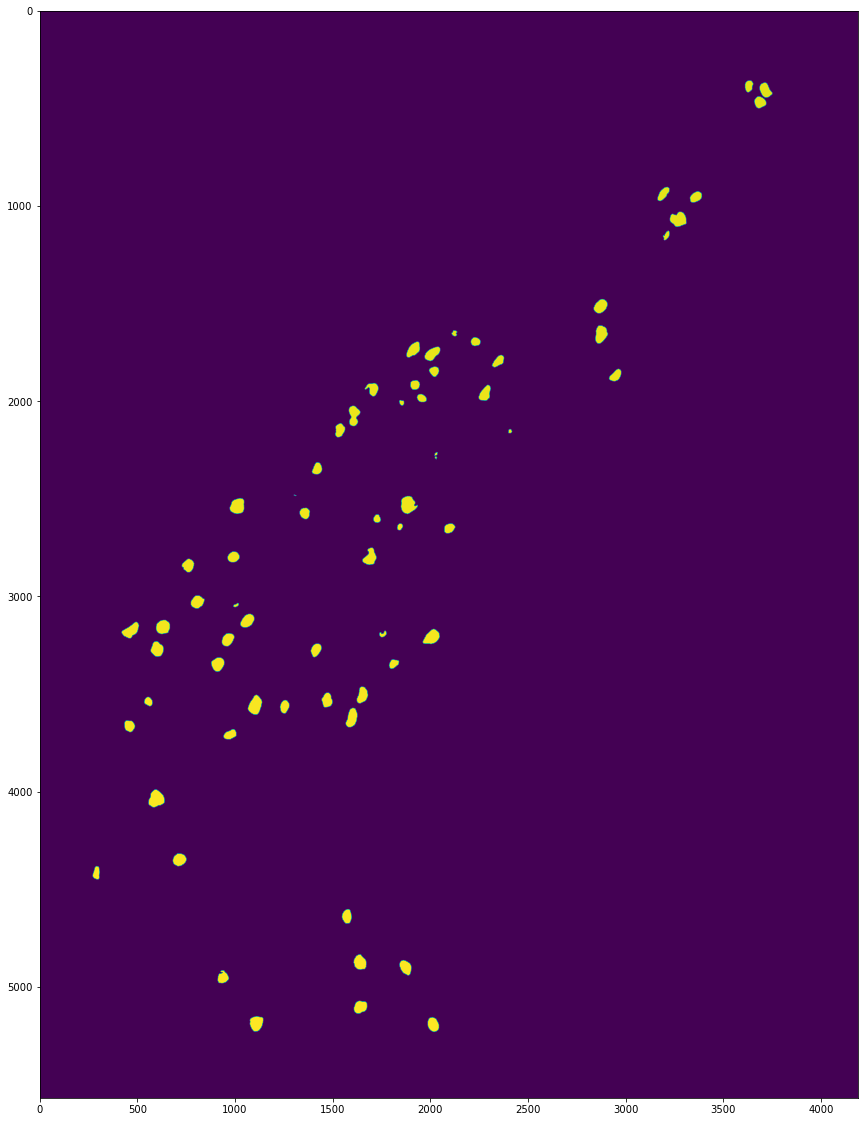

In [106]:
fig = plt.figure(figsize=(20,20))
plt.imshow(single_plane)
plt.show()


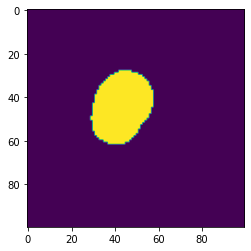

In [90]:
plt.imshow(mask_zstack[2][2600:2700, 1800:1900])

In [64]:
cropped_mask = mask_zstack[2][2600:2700, 1800:1900].copy()

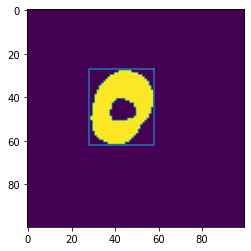

In [65]:
plt.imshow(cropped_mask)
plt.plot([58, 58, 28, 28, 58], [27, 62, 62, 27, 27])

In [66]:
np.unique(cropped_mask)

array([   0, 2082], dtype=uint16)

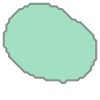

In [67]:
roi = get_polygon_from_instance_segmentation(single_plane = cropped_mask, label_id = 2082)
roi

In [68]:
roi.bounds

(27.0, 28.0, 62.0, 58.0)

In [70]:
bounding_box_coords = [int(elem) for elem in roi.bounds]

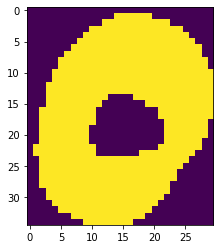

In [71]:
bounding_box = cropped_mask[bounding_box_coords[0]:bounding_box_coords[2], bounding_box_coords[1]:bounding_box_coords[3]]
plt.imshow(bounding_box)

In [72]:
filled_bounding_box = binary_fill_holes(bounding_box)

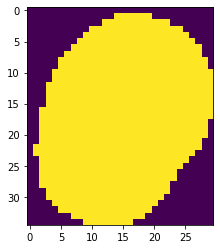

In [73]:
plt.imshow(filled_bounding_box)

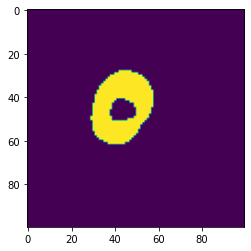

In [74]:
plt.imshow(cropped_mask)

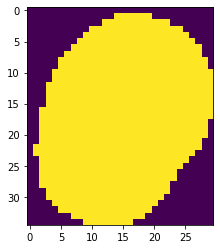

In [75]:
bounding_box[np.where(filled_bounding_box == True)] = 2082
plt.imshow(bounding_box)

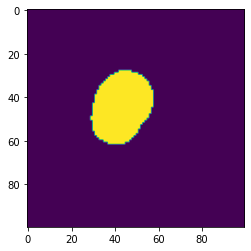

In [76]:
plt.imshow(cropped_mask)

In [25]:
np.unique(filled_mask)

array([False,  True])

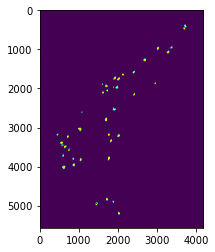

In [14]:
plt.imshow(mask_zstack[6])

# Testing fmc implementation

In [1]:
import sys
sys.path.append('/home/workstation/GitHub_Repos/DCLmeetsRETUNE/image_analysis_pipeline/')
import findmycells

In [2]:
from pathlib import Path
from findmycells.main import Project


from findmycells.postprocessing import ReconstructCellsIn3DFrom2DInstanceLabels, FillHoles, ApplyExclusionCriteria
from findmycells.quantifications import CountFeaturesInWholeAreaROIs

In [3]:
project_root_dir = Path('/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner_3D_all_rois_ens_12_test/')

In [4]:
segmentation_configs = {'cellpose': {'model_type': 'nuclei', #one of: 'cyto', 'cyto2', or 'nuclei'
                                     'net_avg': True}}

In [5]:
quantification_configs = {'exclusion_criteria': {'min_roi_area_size': 425}}

In [6]:
user_input_via_gui = {'project_root_dir': project_root_dir,  
                      'segmentation_configs': segmentation_configs,
                      #'quantification_configs': quantification_configs,
                      'clear_temp_zarrs_from_sys_tmp': True}

In [7]:
th_in_sn = Project(user_input_via_gui)

In [8]:
th_in_sn.load_status()

In [10]:
th_in_sn.postprocess(file_ids = ['0000'],
                     strategies = [ReconstructCellsIn3DFrom2DInstanceLabels, FillHoles, ApplyExclusionCriteria], 
                     segmentations_to_use = 'instance',
                     overwrite = True)
th_in_sn.save_status()

Postprocessing segmentations of file ID: 0000 (1/1)
-Initializing 3D reconstruction from 2D instance segmentations
--matching ROIs across planes (1/13)
--matching ROIs across planes (2/13)
--matching ROIs across planes (3/13)
--matching ROIs across planes (4/13)
--matching ROIs across planes (5/13)
--matching ROIs across planes (6/13)
--matching ROIs across planes (7/13)
--matching ROIs across planes (8/13)
--matching ROIs across planes (9/13)
--matching ROIs across planes (10/13)
--matching ROIs across planes (11/13)
--matching ROIs across planes (12/13)
--matching ROIs across planes (13/13)
-filling holes
-applying exclusion criteria
